In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading the dataset

In [5]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.imdb.load_data(num_words = 10000)
print(f"Size of Train Data - {train_data.shape}")
print(f"Size of Train Label - {train_label.shape}")
print(f"Size of Test Data - {test_data.shape}")
print(f"Size of Test Label - {test_label.shape}")

Size of Train Data - (25000,)
Size of Train Label - (25000,)
Size of Test Data - (25000,)
Size of Test Label - (25000,)


In [3]:
print(train_data[0], type(train_data[0]))
print(train_label[0], type(train_label[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] <class 'list'>
1 <class 'numpy.int64'>


In [4]:
## checking the max index
max([max(seq) for seq in train_data])

# No index will be more that 9999, cause we have restricted ourselves to the top 10,000 most frequent words

9999

In [8]:
# Decoding
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encoding the integer seq into binary matrix

In [11]:
# One hot encoding the whole dataset
def vectorize_seqs(seq, dim=10000):
    res = np.zeros((len(seq), dim))
    for i, s in enumerate(seq):
        res[i, s] = 1
    return res
X_train = vectorize_seqs(train_data)
X_test = vectorize_seqs(train_label)

Y_train = np.asarray(train_label).astype('float32')
Y_test = np.asarray(test_label).astype('float32')

In [12]:
print(f"Size of Train Data - {X_train.shape}")
print(f"Size of Train Label - {X_test.shape}")
print(f"Size of Test Data - {Y_train.shape}")
print(f"Size of Test Label - {Y_test.shape}")

Size of Train Data - (25000, 10000)
Size of Train Label - (25000, 10000)
Size of Test Data - (25000,)
Size of Test Label - (25000,)


In [13]:
print(X_train[0], type(X_train[0]))

[0. 1. 1. ... 0. 0. 0.] <class 'numpy.ndarray'>


## Making the Model

#### Setting aside a validation set

In [14]:
# In order to monitor during training the accuray of the model on data, it has never seen. we create a validation set by setting
# up 10,000 samples from the original dataset
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = Y_train[:10000]
partial_y_train = Y_train[10000:]

### Model Arcitecture

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, 
                                activation = 'relu', 
                                input_shape = (10000, )))
model.add(tf.keras.layers.Dense(units=16, 
                                activation = 'relu'))
model.add(tf.keras.layers.Dense(units=1, 
                                activation = 'sigmoid'))
# Configuring the optimizer
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              loss = tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'],
              )

#training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
8

# printing the model arcitecture
model.summary()

Epoch 1/20
30/30 [==============================] - 5s 111ms/step - loss: 0.5928 - accuracy: 0.6944 - val_loss: 0.4033 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3391 - accuracy: 0.8961 - val_loss: 0.3107 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2322 - accuracy: 0.9295 - val_loss: 0.2904 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1831 - accuracy: 0.9409 - val_loss: 0.2853 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1455 - accuracy: 0.9543 - val_loss: 0.2798 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1219 - accuracy: 0.9640 - val_loss: 0.2941 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0971 - accuracy: 0.9731 - val_loss: 0.3123 - val_accuracy: 0.8842
Epoch 8/20
3

In [18]:
# Testing the history callback

history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
acc = history_dict.get('accuracy')
print(f"Accuracy - {sum(acc)/len(acc) * 100}%")

val_acc = history_dict.get('val_accuracy')
print(f"Validation Accuracy - {sum(val_acc)/len(val_acc) * 100}%")

Accuracy - 96.66800022125244%
Validation Accuracy - 87.53649920225143%


## Plotting training and validation Loss

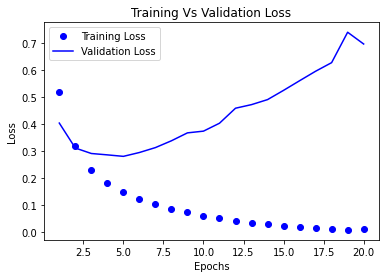

In [28]:
loss = history_dict.get('loss')
val_loss = history_dict.get('val_loss')

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting training and validation Accuracy

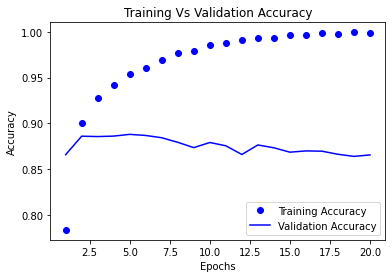

In [30]:
plt.clf() # Clear the figure
acc = history_dict.get('accuracy')
val_acc = history_dict.get('val_accuracy')

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()